In [32]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from dummyPy import OneHotEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier


In [138]:
train=pd.read_csv('./data/train_users_2.csv', encoding='utf-8')
test=pd.read_csv('./data/test_users.csv', encoding='utf-8')
dataset=pd.read_csv('./data/train_users_2.csv', encoding='utf-8')
add=pd.read_csv('./data/secs_03.csv', encoding='utf-8')
add2=pd.read_csv('./data/df.csv', encoding='utf-8')
labels=train['country_destination']
id_test =test['id']

C:\Python\Anaconda3-5.2\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Python\Anaconda3-5.2\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [139]:
df_all=train.append(test)

C:\Python\Anaconda3-5.2\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [141]:
add2.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'affiliate_channel', 'affiliate_provider',
       'age', 'country_destination', 'date_account_created',
       'date_first_booking', 'first_affiliate_tracked', 'first_browser',
       'first_device_type', 'gender', 'id', 'language', 'signup_app',
       'signup_flow', 'signup_method', 'timestamp_first_active', 'age_range',
       'AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NL', 'PT', 'US'],
      dtype='object')

In [142]:
df_all['timelag_nu']=add['timelag_nu']
df_all['secs_elapsed']=add['secs_elapsed']
df_all['AU']=add2['AU']
df_all['CA']=add2['CA']
df_all['DE']=add2['DE']
df_all['ES']=add2['ES']
df_all['FR']=add2['FR']
df_all['GB']=add2['GB']
df_all['IT']=add2['IT']
df_all['NL']=add2['NL']
df_all['PT']=add2['PT']
df_all['US']=add2['US']

In [144]:
df_all=df_all.fillna(-1)

In [150]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275547 entries, 0 to 213450
Data columns (total 31 columns):
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
age                        275547 non-null float64
country_destination        275547 non-null object
first_affiliate_tracked    275547 non-null object
first_browser              275547 non-null object
first_device_type          275547 non-null object
gender                     275547 non-null object
id                         275547 non-null object
language                   275547 non-null object
signup_app                 275547 non-null object
signup_flow                275547 non-null int64
signup_method              275547 non-null object
timelag_nu                 275547 non-null int64
secs_elapsed               275547 non-null float64
AU                         275547 non-null float64
CA                         275547 non-null float64
DE                         275547 non

In [146]:
mask = df_all.age < 14
column_name = 'age'
df_all.loc[mask, column_name] = -1

In [147]:
mask = df_all.age > 100
column_name = 'age'
df_all.loc[mask, column_name] = -1

In [206]:
#selRows = df_all[df_all['age'] < 14].index
#df_all = df_all.drop(selRows, axis=0)

In [207]:
#selRows = df_all[df_all['age'] > 100].index
#df_all = df_all.drop(selRows, axis=0)

In [148]:
df_all['dac']=df_all['date_account_created'].str.split('-')
df_all = df_all.join(pd.DataFrame(df_all['dac'].tolist()))
df_all.rename(columns={0: 'dac_year',1: 'dac_month',2: 'dac_day'}, inplace=True)
df_all=df_all.drop(['date_account_created','dac', 'date_first_booking'], axis=1)

In [149]:
df_all['tfa_year']=df_all['timestamp_first_active'].astype(str).str.slice(0,4)
df_all['tfa_month']=df_all['timestamp_first_active'].astype(str).str.slice(4,6)
df_all['tfa_day']=df_all['timestamp_first_active'].astype(str).str.slice(6,8)
df_all=df_all.drop(['timestamp_first_active'], axis=1)

In [154]:
df_all['first_affiliate_tracked']=df_all['first_affiliate_tracked'].astype(str)

In [151]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275547 entries, 0 to 213450
Data columns (total 31 columns):
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
age                        275547 non-null float64
country_destination        275547 non-null object
first_affiliate_tracked    275547 non-null object
first_browser              275547 non-null object
first_device_type          275547 non-null object
gender                     275547 non-null object
id                         275547 non-null object
language                   275547 non-null object
signup_app                 275547 non-null object
signup_flow                275547 non-null int64
signup_method              275547 non-null object
timelag_nu                 275547 non-null int64
secs_elapsed               275547 non-null float64
AU                         275547 non-null float64
CA                         275547 non-null float64
DE                         275547 non

In [155]:
encoder = OneHotEncoder(['gender', 'signup_method', 'signup_flow', 'language', 'first_affiliate_tracked', 'affiliate_channel', 'affiliate_provider', 'signup_app', 'first_device_type', 'first_browser'])

In [156]:
encoder.fit(df_all)
df_combine=encoder.transform(df_all)

In [157]:
df_all

,affiliate_channel,affiliate_provider,age,country_destination,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,...,IT,NL,PT,US,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day
0,direct,direct,-1.0,NDF,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,...,0.000000,0.000000,0.000000,0.000000,2010,06,28,2009,03,19
0,direct,direct,35.0,-1,untracked,Mobile Safari,iPhone,FEMALE,5uwns89zht,en,...,0.000000,0.000000,0.000000,0.000000,2010,06,28,2014,07,01
1,seo,google,38.0,NDF,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,...,0.979041,0.895545,0.992857,0.875711,2011,05,25,2009,05,23
1,direct,direct,-1.0,-1,untracked,Mobile Safari,iPhone,-unknown-,jtl0dijy2j,en,...,0.979041,0.895545,0.992857,0.875711,2011,05,25,2014,07,01
2,direct,direct,56.0,US,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,...,0.758162,0.806452,0.814286,0.862351,2010,09,28,2009,06,09
2,direct,direct,-1.0,-1,linked,Chrome,Windows Desktop,-unknown-,xx0ulgorjt,en,...,0.758162,0.806452,0.814286,0.862351,2010,09,28,2014,07,01
3,direct,direct,42.0,other,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,...,1.000000,0.980031,0.942857,0.918807,2011,12,05,2009,10,31
3,direct,direct,-1.0,-1,linked,IE,Windows Desktop,-unknown-,6c6puo6ix0,en,...,1.000000,0.980031,0.942857,0.918807,2011,12,05,2014,07,01
4,direct,direct,41.0,US,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,...,0.000000,0.000000,0.000000,0.000000,2010,09,14,2009,12,08
4,direct,direct,-1.0,-1,untracked,Safari,Mac Desktop,-unknown-,czqhjk3yfe,en,...,0.000000,0.000000,0.000000,0.000000,2010,09,14,2014,07,01


In [214]:
pd.set_option('display.max_rows', 500)

In [158]:
df_combine.columns = df_combine.columns.str.replace(' ', '')

In [159]:
mapping= {'NDF':0, 'US':1, 'other':2, 'FR':3, 'CA':4, 'GB':5, 'ES':6, 'IT':7, 'PT':8, 'NL':9, 'DE':10, 'AU':11}

Y_train=df_combine[df_combine['id'].isin(train['id'])]
Y_train=Y_train['country_destination'].map(mapping)
df_combine=df_combine.drop(['country_destination'],axis=1)

X_train=df_combine[df_combine['id'].isin(train['id'])]
X_test=df_combine[df_combine['id'].isin(test['id'])]
X_test=X_test.drop(['id'],axis=1)
X_train=X_train.drop(['id'],axis=1)
Y_train=pd.DataFrame(Y_train)

X_train=X_train.astype('float32', copy=False)
X_test=X_test.astype('float32', copy=False)
Y_train=Y_train.astype('int32', copy=False)

In [160]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213451 entries, 0 to 275546
Columns: 173 entries, affiliate_channel_api to tfa_day
dtypes: float32(173)
memory usage: 142.5 MB


In [22]:
#XGBOOST

In [161]:
import xgboost as xgb
import time
import tensorflow as tf
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.33, random_state=7)

dtrain = xgb.DMatrix(x_train,y_train)
dtest = xgb.DMatrix(x_test)

param = {    'max_depth': 9,
    'learning_rate': 0.01,
    'n_estimators': 5,
    'objective': 'multi:softmax',
    'num_class': 12,
    'gamma': 0,
    'min_child_weight': 6,
    'max_delta_step': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'colsample_bylevel': 1,
    'reg_alpha': 0.01,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'base_score': 0.5,
    'missing': None,
    'silent': True,
    'nthread': 4,
    'seed': 27}
training_start = time.perf_counter()
bst = xgb.train(param, dtrain)
training_end = time.perf_counter()
# make prediction
prediction_start = time.perf_counter()
preds = bst.predict(dtest)
prediction_end = time.perf_counter()
nd_y_test=y_test.values.reshape(len(y_test.values))
acc_xgb = (preds == nd_y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 63.42
Time consumed for training: 84.235
Time consumed for prediction: 1.08651 seconds


In [162]:
import xgboost as xgb
import time
import tensorflow as tf
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.33, random_state=7)

dtrain = xgb.DMatrix(x_train,y_train)
dtest = xgb.DMatrix(x_test)

param = {    'max_depth': 9,
    'learning_rate': 0.01,
    'n_estimators': 5,
    'objective': 'multi:softprob',
    'num_class': 12,
    'gamma': 0,
    'min_child_weight': 6,
    'max_delta_step': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'colsample_bylevel': 1,
    'reg_alpha': 0.01,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'base_score': 0.5,
    'missing': None,
    'silent': True,
    'nthread': 4,
    'seed': 27}
bst = xgb.train(param, dtrain)


In [286]:
temp=pd.DataFrame(preds)
temp[0].unique()

array([0., 1.])

In [140]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import font_manager, rc

# font_name = font_manager.FontProperties(fname="/Library/Fonts/AppleGothic.ttf").get_name()
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

%matplotlib inline
plt.rcParams['figure.figsize'] = 200,200

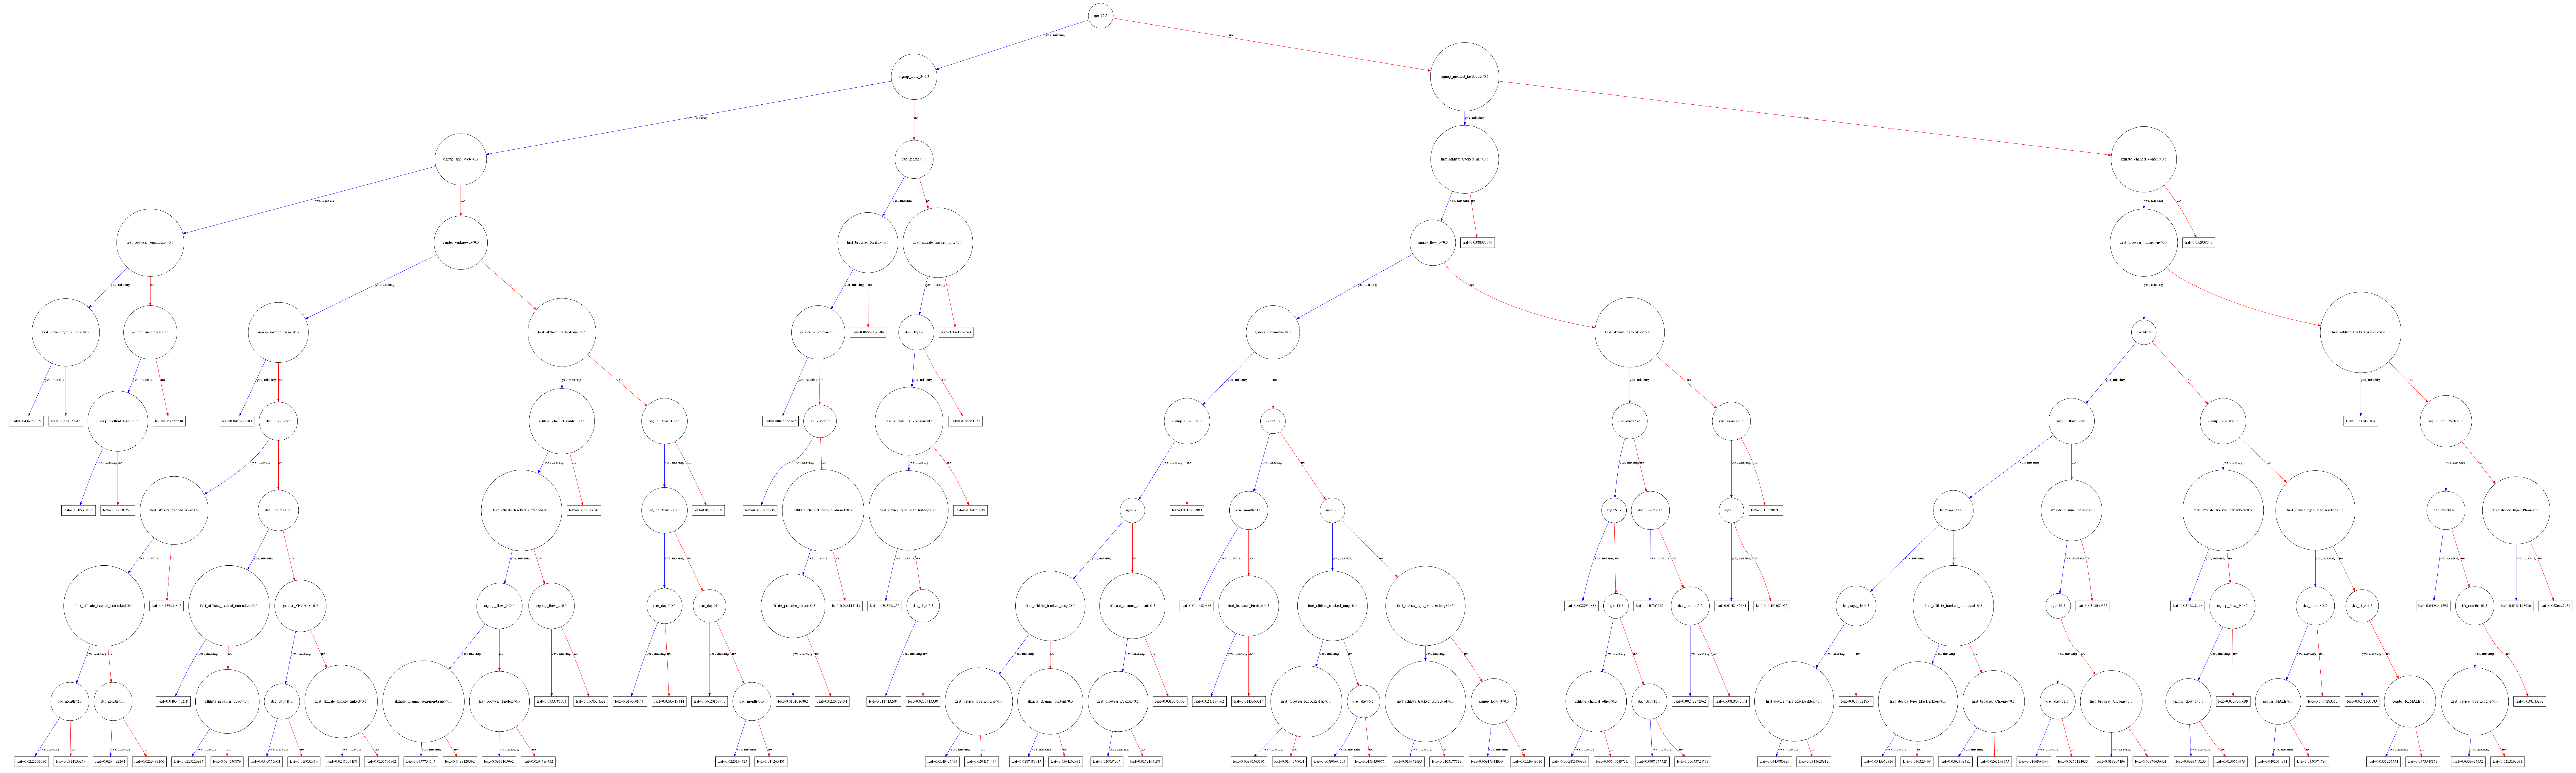

In [141]:
xgb.plot_tree(bst)

In [ ]:
#Randomfrest

In [86]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
np.random.seed(0)

In [106]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.33, random_state=7)
clf = RandomForestClassifier(n_jobs=100, random_state=0)
training_start = time.perf_counter()
clf.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds=clf.predict(x_test)
prediction_end = time.perf_counter()
nd_y_test=y_test.values.reshape(len(y_test.values))
acc_xgb = (preds == nd_y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("RF's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

C:\Python\Anaconda3-5.2\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RF's prediction accuracy is: 57.35
Time consumed for training: 2.051
Time consumed for prediction: 0.26475 seconds


In [284]:
#Softmax

In [217]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.33, random_state=7)

encoder = OneHotEncoder(['country_destination'])
encoder.fit(y_train)
y_train=encoder.transform(y_train)
y_train=y_train.astype('int32', copy=False)

In [218]:
import time
import os

def chk_processting_time(start_time, end_time):
    process_time = end_time - start_time
    p_time = int(process_time)
    p_min = p_time // 60
    p_sec = p_time %  60
    print('처리시간 : {p_min}분 {p_sec}초 경과되었습니다.'.format(
            p_min = p_min, 
            p_sec = p_sec
        ))
    return process_time

In [221]:
tf.reset_default_graph()
import tensorflow as tf
import random
import matplotlib.pyplot as plt

tf.set_random_seed(777)  # reproducibility

# parameters
learning_rate = 0.0001
training_epochs = 15
batch_size = 100
nb_classes = 12
keep_prob = 0.7
# input place holders
X = tf.placeholder(tf.float32, [None, 161])
Y = tf.placeholder(tf.int32, [None, 12])

# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[161, 128],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([128]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.get_variable("W2", shape=[128, 128],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([128]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.get_variable("W3", shape=[128, 128],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([128]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob)

W4 = tf.get_variable("W4", shape=[128, 128],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([128]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob)

W5 = tf.get_variable("W5", shape=[128, 12],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([12]))
logits = tf.matmul(L4, W5) + b5
hypothesis = tf.nn.softmax(logits)


# Cross entropy cost/loss
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y)
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(y_train, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [222]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2000):
    feed_dict = {X: x_train, Y: y_train}
    sess.run(optimizer, feed_dict=feed_dict)
    if step % 10 == 0:
        loss, acc = sess.run([cost, accuracy], feed_dict={X: x_train, Y: y_train})
        print("Step: {:5}, \t Loss: {:.3f}, \t Acc: {:.2%}".format(step, loss, acc))

Step:     0, 	 Loss: 2.533, 	 Acc: 8.50%
Step:    10, 	 Loss: 2.442, 	 Acc: 17.59%
Step:    20, 	 Loss: 2.365, 	 Acc: 25.30%
Step:    30, 	 Loss: 2.337, 	 Acc: 28.12%
Step:    40, 	 Loss: 2.331, 	 Acc: 28.81%
Step:    50, 	 Loss: 2.329, 	 Acc: 29.01%
Step:    60, 	 Loss: 2.327, 	 Acc: 29.12%
Step:    70, 	 Loss: 2.327, 	 Acc: 29.14%
Step:    80, 	 Loss: 2.327, 	 Acc: 29.15%
Step:    90, 	 Loss: 2.327, 	 Acc: 29.18%
Step:   100, 	 Loss: 2.327, 	 Acc: 29.19%
Step:   110, 	 Loss: 2.326, 	 Acc: 29.22%
Step:   120, 	 Loss: 2.327, 	 Acc: 29.21%
Step:   130, 	 Loss: 2.326, 	 Acc: 29.22%
Step:   140, 	 Loss: 2.326, 	 Acc: 29.23%
Step:   150, 	 Loss: 2.326, 	 Acc: 29.23%
Step:   160, 	 Loss: 2.326, 	 Acc: 29.23%
Step:   170, 	 Loss: 2.326, 	 Acc: 29.24%
Step:   180, 	 Loss: 2.326, 	 Acc: 29.23%
Step:   190, 	 Loss: 2.326, 	 Acc: 29.24%
Step:   200, 	 Loss: 2.326, 	 Acc: 29.25%
Step:   210, 	 Loss: 2.326, 	 Acc: 29.24%
Step:   220, 	 Loss: 2.326, 	 Acc: 29.24%
Step:   230, 	 Loss: 2.326, 	 Acc: 

KeyboardInterrupt: 

In [115]:
result=bst.predict(X_test)

In [287]:
#제출용 파일생성
X_test=xgb.DMatrix(X_test)
result=bst.predict(X_test)
result=pd.DataFrame(result)
result=result[0]
inv_mapping= {0:'NDF', 1:'US', 2:'other', 3:'FR', 4:'CA', 5:'GB', 6:'ES', 7:'IT', 8:'PT', 9:'NL', 10:'DE', 11:'AU'}
result=result.map(inv_mapping)
result_test=test.drop(['date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'], axis=1)
result_test=result_test.join(result)
result_test.columns=['id','country']
filename='Submission_{}.csv'.format(acc_xgb) #Accracy 변수 설정
result_test.to_csv(filename,index=False)

In [288]:
result.value_counts()


NDF    37351
US     24745
Name: 0, dtype: int64

In [163]:
X_test=xgb.DMatrix(X_test) #Dmatrix 변환 오류시 주석처리

y_pred = bst.predict(X_test)  
#Taking the 5 classes with highest probabilities
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += np.argsort(y_pred[i])[::-1][:5].tolist()

#Generate submission
country_label = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
result=pd.DataFrame(country_label['country'])
country_label.drop(['country'], axis=1, inplace=True)
result=result['country'].astype(int)
inv_mapping= {0:'NDF', 1:'US', 2:'other', 3:'FR', 4:'CA', 5:'GB', 6:'ES', 7:'IT', 8:'PT', 9:'NL', 10:'DE', 11:'AU'}
result=result.map(inv_mapping)
country_label['country']=result
country_label.to_csv('Submission.csv', encoding='utf-8')